<div style="display: flex; justify-content: space-between; align-items: center; margin-bottom: 40px; margin-top: 0;">
    <div style="flex: 0 0 auto; margin-left: 0; margin-bottom: 0; margin-top: 0;">
        <img src="./pics/UCSD Logo.png" alt="UCSD Logo" style="width: 179px; margin-bottom: 0px; margin-top: 20px;">
    </div>
    <div style="flex: 0 0 auto; margin-left: auto; margin-bottom: 0; margin-top: 20px;">
        <img src="./pics/LANL-logo.png" alt="LANL Logo" style="width: 200px; margin-bottom: 0px;">
    </div>
    <div style="flex: 0 0 auto; margin-left: auto; margin-bottom: 0; margin-top: 20px;">
        <img src="./pics/prowess.png" alt="Prowess Logo" style="width: 200px; margin-bottom: 0px;">
    </div>
    <div style="flex: 0 0 auto; margin-left: auto; margin-bottom: 0; margin-top: 20px;">
        <img src="./pics/wildfire.png" alt="WildFire Logo" width="100"/>
    </div>
</div>

<h1 style="text-align: center; font-size: 48px; margin-top: 0;">Fire-Ready Forests Data Challenge</h1>

# Sprint 3: TLS Generated Metrics

In Sprint 1, you worked with TLS data, exploring its format, size, and extracting a sample to create a small visualization. You also looked at a simple approach to process this data.

TLS has the potential to provide accurate and efficient data on forest conditions, including forest structure, vegetation, and fuel loads. As Pokswinski et al. state:

> *The integration of Terrestrial Laser Scanning (TLS) methods into forest monitoring strategies can cost effectively standardize data collection, improve efficiency, and reduce error, with datasets that can easily be analyzed to better inform management decisions.<sup>1</sup>*

In this notebook, we will present metrics derived from TLS data. Our goal is to expose you to these metrics and think about how this information can be incorporated into your workflow. We will not delve into the technical details of how each metric is produced.

For those interested in learning more about TLS data collection, applications, and processing, please refer to the documents included in the references.

## IntELiMon 

The [Interagency Ecosystem LiDAR Monitoring (IntELiMon)](https://dmsdata.cr.usgs.gov/lidar-monitoring/viewer/) is a dashboard for users to access the processed TLS data, metadata, and the results of the processing and analyses. Quality control/quality assurance and metadata management is built into the data workflow.<sup>2</sup>

IntELiMon offers a series of metrics for each of the available plots. These metrics have been registered in the NDP catalog and are presented to you in the following cell.

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading the metrics
metrics = pd.read_csv("./combined_intelimon_metrics.csv")
metrics

,Unnamed: 0,blk_plot,h_script_name,h_ground_cnt,h_not_ground_cnt,h_per_ground,h_ng_tgi,h_ng_vari,h_l1_cnt,h_l1_per,...,crs,LF_EVC,LF_EVT,LF_FBFM13,LF_FBFM40,LF_CBD,LF_FDist,LF_ASP,LF_EVEL,LF_SLPD
0,0,CALNU_0040_20241108_1,IntELiMon_1.1.1,2110494,2753700,43.388360,-2.380811,99590.623727,38621,1.402513,...,EPSG:3857,169,7043,10,165,16,0,236,545,5
1,1,CALNU_0028_20241110_1,IntELiMon_1.1.1,2015385,4061555,33.164471,-5.792146,335757.438613,81886,2.016124,...,EPSG:3857,178,7043,10,165,22,0,357,539,15
2,2,CATCU_0108_20241010_1,IntELiMon_1.1.1,2102920,1620220,56.482431,4.558627,185800.310271,19446,1.200207,...,EPSG:3857,145,7030,8,184,8,312,193,1149,12
3,3,CASBC_0001_20240910_1,IntELiMon_1.1.1,1378206,1945910,41.460827,-0.417289,159190.345128,365136,18.764280,...,EPSG:3857,246,7105,4,145,0,0,195,402,15
4,4,CASBC_0002_20240910_1,IntELiMon_1.1.1,2040919,4696153,30.293858,-1.172542,155330.143139,171989,3.662338,...,EPSG:3857,242,7092,5,122,0,0,115,408,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,137,CAFKU_0156_20240719_1,IntELiMon_1.1.1,1665468,5213584,24.210720,-9.978230,104653.238061,371358,7.122893,...,EPSG:3857,125,7027,5,122,4,513,304,1719,5
138,138,CAFKU_0157_20240716_1,IntELiMon_1.1.1,1975167,2022497,49.408029,-8.748271,154641.520435,119264,5.896869,...,EPSG:3857,145,7027,5,142,24,333,246,1758,4
139,139,CAFKU_0158_20240719_1,IntELiMon_1.1.1,1927754,2992930,39.176545,-3.383549,36833.773772,74978,2.505171,...,EPSG:3857,145,7027,10,165,11,513,238,1717,5
140,140,CAFKU_0159_20240719_1,IntELiMon_1.1.1,2063086,3042115,40.411455,-3.096311,121524.950679,102156,3.358058,...,EPSG:3857,145,7028,10,165,8,513,263,1732,11


As we can observe, there is a lot of information that ha. A complementary document describing each of these metrics is also provided.

In [3]:
# Loading metrics columns descriptions
metrics_columns = pd.read_csv("./IntELiMon_metrics_table_descriptions.csv").iloc[:, :6]
metrics_columns.head()

,Metrics,Scan Division,Metric type,Raw point cloud/Voxelized point cloud,Description (simplified),Description (Detailed)
0,h_filename,Entire point cloud,NaN,NaN,File name of the scan,File name of the scan that includes location I...
1,h_ground_cnt,Entire point cloud,General,Raw,Number of points classified as ground,The number of points in a raw point cloud that...
2,h_not_ground_cnt,Entire point cloud,General,Raw,Number of points not classified as ground,The number of points in a raw point cloud that...
3,h_per_ground,Entire point cloud,General,Raw,Percent of ground points in the scan,The percentage of points in the scan that were...
4,h_ng_tgi,Entire point cloud,General,Raw,Triangular greenness index of points classifie...,Triangular greenness index of points classifie...


## Points2Pano

[Points2Pano](https://burnpro3d.sdsc.edu/points2pano/?plot=GAPDR_1071&ts=20220608&m=Basalarea) is an Immersive Forest tool by UCSDs [WIFIRE](https://wifire.ucsd.edu/) lab. RGB colored point clouds submitted to IntELiMon are projected into a spherical raster and displayed on the Points2Pano website. Plots can be viewed by scan date and qualitative comparisons can be made.<sup>2</sup>

You're encouraged to explore this platform.

## TLS Trees vs Field Collected Data

As seen in Points2Pano, TLS can identify trees within a specific range and extract valuable information. In Sprint 1, you were introduced to a treelist collected by a professional team at the UC Climate Action Seed Project study sites. Now, we have a TLS-derived treelist for these same locations.

In the following cells, we will compare tree inventories generated from TLS with field-collected data for the same plots.

In [8]:
# Loading the full plots inventory
plot_inventory = pd.read_csv("./01_plot_identification.csv")

# Specify our site of interest
site_name = "ind"

# We only keep the inventory plots for Independence Lake
ind_inventory = plot_inventory.loc[plot_inventory.site_name == site_name, ['inventory_id', 'plot_blk']]
ind_inventory

,inventory_id,plot_blk
16,53_pre_ind_burn3d,CATNF_6053_20240817_1
17,46_pre_ind_burn3d,CATNF_6046_20240817_1
18,44_pre_ind_burn3d,CATNF_6044_20240817_1
19,55_pre_ind_burn3d,CATNF_6055_20240816_1
21,47_pre_ind_burn3d,CATNF_6047_20240816_1
22,42_pre_ind_burn3d,CATNF_6042_20240816_1
23,52_pre_ind_burn3d,CATNF_6052_20240815_1
24,66_pre_ind_burn3d,CATNF_6066_20240815_1
25,60_pre_ind_burn3d,CATNF_6060_20240815_1
26,45_pre_ind_burn3d,CATNF_6045_20240815_1


There are a total of 21 blocks associated with Independence Lake. However, for this analysis, we will focus on the first five blocks. We will extract tree data corresponding to these selected plots from both the TLS Treelist and the field-observed dataset.

In [5]:
# We sample the first 5 plots
ind_sample = ind_inventory.head()

# Load both the TLS and the field collected treelist
tls_treelist = pd.read_csv("./TLS_treelist.csv")
field_treelist = pd.read_csv("./03_tree.csv")

# Filter tls_treelist based on plot_blk in ind_sample
tls_treelist_ind = tls_treelist.merge(ind_sample[['plot_blk']], on='plot_blk', how='inner')

# Filter field_treelist based on inventory_id in ind_sample
field_treelist_ind = field_treelist.merge(ind_sample[['inventory_id']], on='inventory_id', how='inner')


Now, let's compare the trees from source to the other. Theorically, they are both representing the same sites.

Text(0.5, 1.0, 'TLS vs Field Data')

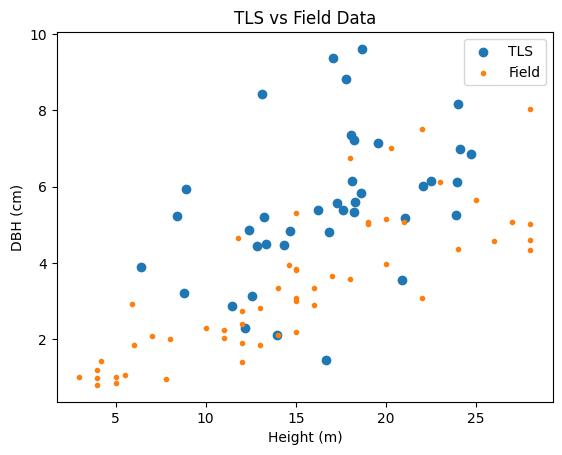

In [6]:
# Plot trees from both sources
fig, ax = plt.subplots()
plt.scatter(tls_treelist_ind.H, tls_treelist_ind.DBH/2.54, axes = ax, label = 'TLS')
plt.scatter(field_treelist_ind.tree_ht, field_treelist_ind.tree_dbh/10, axes = ax, marker = '.',label= 'Field')
plt.xlabel('Height (m)')
plt.ylabel('DBH (cm)')
plt.legend()
plt.title('TLS vs Field Data')

As you can observe, even when both data sources represent the same sites, the tree inventories they provide can differ significantly.

### References

1. [A simplified and affordable approach to forest monitoring using single terrestrial laser scans and transect sampling.](https://www.sciencedirect.com/science/article/pii/S2215016121002776) Scott Pokswinski, Michael R. Gallagher, Nicholas S. Skowronski, E. Louise Loudermilk, Christie Hawley, Derek Wallace, Alexis Everland, Jon Wallace, J. Kevin Hiers, MethodsX, 2021.
2. [Interagence LiDAR Monitoring and Research Applications - Applications](https://dmsdata.cr.usgs.gov/lidar-monitoring/applications)
3. [Traditional field metrics and terrestrial LiDAR predict plant richness in southern pine forests.](https://www.sciencedirect.com/science/article/pii/S0378112721002073?via%3Dihub)  C.T. Anderson, S.L. Dietz, S.M. Pokswinski, A.M. Jenkins, M.J. Kaeser, J.K. Hiers, B.D. Pelc, Forest Ecology and Management, 2021.
4. [Terrestrial laser scan metrics predict surface vegetation biomass and consumption in a frequently burned southeastern U.S. ecosystem.](https://research.fs.usda.gov/treesearch/66840) E. Louise Loudermilk, Scott Pokswinski, Christie M. Hawley, Aaron Maxwell, Michael Gallagher, Nicholas Skowronski, Andrew T. Hudak, Chad Hoffman, J. Kevin Hiers, bioRxiv, 2023 